In [1]:
import numpy as np
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("inputfile.csv",sep=';').drop(columns=['Unnamed: 0'])
# df['GroundTruthRating']=(df.GroundTruthRating-3) #likert scale

In [3]:
check_cols=['peds_speed', 'weaving', 'swerving','sideslip', 'timeofday',
            'roadtype', 'Congestion', 'BrakeLight','Jerk_binary', 'relspeed_binary',
            'reldist_binary','turns_binary', 'stop_binary']

In [4]:
df['ID']=df[check_cols].apply(lambda e:f'{e[0]}{1 if e[1]==1 or e[2]==1 or e[3]==1 else 0}{e[4]}{e[5]}{e[6]}{e[7]}{e[8]}{e[9]}{e[10]}{e[11]}{e[12]}',axis=1)

unique_state=df['ID'].unique()
uDict=dict(zip(unique_state,range(len(unique_state))))
df['state']=df['ID'].map(uDict)

In [5]:
matrix=[]
for s0 in tqdm(range(len(unique_state))):
    row=[]
    for s1 in range(len(unique_state)):
        count_cond=0
        count=0
        for i in range(df.shape[0]-1):
            if df['state'][i]==s0 and df['state'][i+1]==s1:
                 count_cond+=1;count+=1
            elif df['state'][i]==s0:
                count+=1
        row.append(count_cond/(count+1e-7))
    matrix.append(row)

100%|████████████████████████████████████████████████████████████████████████████████| 268/268 [32:21<00:00,  7.24s/it]


In [6]:
P=np.array(matrix)

In [7]:
R=df.groupby('state')['GroundTruthRating'].mean().sort_index().values.reshape(-1,1)

In [8]:
#Value Iteration

In [9]:
gamma=0.99

In [10]:
V=np.matmul(np.matrix(np.eye(len(unique_state))-gamma*P).I,R)

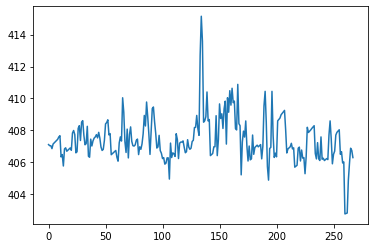

In [11]:
plt.plot(V)

In [12]:
np.round(P.sum(axis=1))

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

In [13]:
df['value']=df['state'].apply(lambda e:V[e,0])

In [14]:
df.to_csv('output1.csv')

,FileName,timestamp,peds_speed,weaving,swerving,sideslip,timeofday,roadtype,Congestion,BrakeLight,GroundTruthRating,Jerk_binary,relspeed_binary,reldist_binary,turns_binary,stop_binary,ID,state,value
0,0000f77c-62c2a288,5s,0,0,0,0,1,2,0,0,4,0,0,0,0,0,00120000000,0,407.115536
1,0000f77c-62c2a288,10s,0,0,0,0,1,2,0,0,4,0,0,0,0,1,00120000001,1,407.044341
2,0000f77c-62c2a288,15s,0,0,0,0,1,2,0,0,4,0,0,0,0,0,00120000000,0,407.115536
3,0000f77c-62c2a288,20s,0,0,0,0,1,2,0,0,4,1,0,0,1,1,00120010011,2,407.044341
4,0000f77c-62c2a288,25s,0,0,0,0,1,2,0,0,4,0,0,0,0,0,00120000000,0,407.115536
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
669,006382a3-4a442001,10s,0,0,0,0,0,1,1,1,3,1,0,0,0,0,00011110000,267,406.300285
670,006382a3-4a442001,15s,0,0,0,0,0,1,1,0,3,0,0,0,0,0,00011000000,49,407.374066
671,006382a3-4a442001,25s,0,0,0,0,0,1,1,0,4,1,0,0,0,1,00011010001,200,406.348245
672,006382a3-4a442001,30s,0,0,0,0,0,1,1,0,4,1,0,0,0,0,00011010000,68,406.621298


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import numpy as np
from sklearn import tree

In [ ]:
regressor = RandomForestRegressor(n_estimators=10, random_state=0)

data = pd.read_csv('output1.csv',header=0,sep=";")
df = pd.DataFrame(data, columns = data.columns)

df.shape
df.columns

In [ ]:
x = df.drop(columns = ["Unnamed: 0","Unnamed: 0.1","FileName","timestamp","GroundTruthRating","ID","state","value","norm_value"])
#print(x[0:5])
y = df["norm_value"]#save the feature name and target variables
x.columns
# y.columns
feature_names = x.columns
 
# fit the regressor with x and y data
regressor.fit(x, y)

In [ ]:
train_pred = regressor.predict(x[:1])
feature_imp = pd.Series(regressor.feature_importances_,index=feature_names).sort_values(ascending=False)
type(feature_imp)
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.rcParams["figure.figsize"] = (7,10)
plt.legend()
plt.show()


In [ ]:
for i,v in enumerate(feature_imp):
	print('Feature: %s, Score: %.5f' % (feature_imp.index[i],v))
  

In [ ]:
import shap
X_importance = x[:] ######## test set passed, can be passed training set as well

# Explain model predictions using shap library:
explainer = shap.TreeExplainer(regressor) ###### lgb_model is the fitted model
shap_values = explainer.shap_values(X_importance)
shap.summary_plot(shap_values, X_importance)

In [ ]:
importance_df = pd.DataFrame(index=[X_importance.columns.tolist()])
#importance_df = pd.DataFrame([X_importance.columns.tolist()]).T
#importance_df.columns = ['column_name']
print(importance_df)
for i in np.unique(y):
    shap_sum = np.abs(shap_values[i]).mean(axis=0)
    shap_sum= shap_sum.astype('float')
    importance_df[i] = shap_sum.tolist()



importance_df = importance_df.sort_values(0, ascending=False)
result = importance_df.idxmax(axis=1)
importance_df
importance_df.head(5)
print(result)
data_top = importance_df.head(5)
important_fetures= data_top.index.tolist()